In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from module_KTX_KK import * 
from preprocessing_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Data Preprocessing

In [4]:
# 데이터로딩
file_location=r'G:\내 드라이브\Research\SavedData\KoSubway\df_subway_prep.csv'
df_old = pd.read_csv(file_location)

In [17]:
# 데이터로딩
file_location=r'G:\내 드라이브\Research\SavedData\KoSubway\df_subway_prep_20241112.csv'
df = pd.read_csv(file_location)
print(df.shape)

# 전처리
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    
    # 수송인원 높은 역 필터링
    top_stations = ['홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
                  '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
                   '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
                    '시청', '여의도', '경복궁', '안국', '종로3가'] 
    
    #top_stations = ['서울대입구','선릉','성수','신림','신도림'] 
    
    df = df[df['역명'].isin(top_stations)].reset_index(drop=True)
    
    selected_columns = df.columns
    
    # 제외할 변수 지정
    excluded_columns = ['역명', '면적', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
                        'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분','승하차인원','일별_승하차인원_합','호선'
                        ,'시간대별_환승_승객_수','시간대별_승하차_비율']
    
    feature_columns = [col for col in selected_columns if col not in excluded_columns]
    
    # 독립 변수와 종속 변수 분리
    X = df[feature_columns]
    y = df['승강장_혼잡도']
    
    # 학습용과 테스트용 데이터로 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 결과를 딕셔너리 형태로 반환
    data = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_columns': feature_columns,
        'scaler': scaler,  # 추가
        'df_train': df.iloc[X_train.index],
        'df_test': df.iloc[X_test.index]
    }
    
    return data

# 데이터 전처리
df = preprocess_data(file_location)

(1649016, 114)


In [21]:
df['df_train'][df['feature_columns']]

,시간,승차인원,하차인원,우대권인원수,청소년인원수,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),출입구,섬식여부,환승노선_개수,환승유입인원수,지하철요금,달러 환율,승하차인원차,보통휘발유,자동차용경유,실업률(%),청년실업률(%),동행지수 순환변동치,선행지수 순환변동치,서울_인구(천명),서울_인구밀도,수도권_인구(천명),수도권_인구밀도,자동차등록대수(만대),기준금리,한국CPI,CPI_대비_지하철요금,요일_Saturday,요일_Sunday,공휴일여부,요일_Monday,요일_Tuesday,요일_Wednesday,요일_Thursday,요일_Friday,년도_2021,년도_2022,년도_2023,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12,일_1,일_2,일_3,일_4,일_5,일_6,일_7,일_8,일_9,일_10,일_11,일_12,일_13,일_14,일_15,일_16,일_17,일_18,일_19,일_20,일_21,일_22,일_23,일_24,일_25,일_26,일_27,일_28,일_29,일_30,일_31,상선 혼잡도,하선 혼잡도,상행_평균운행간격,하행_평균운행간격,상행_운행횟수,하행_운행횟수,역_시간별_평균운행간격,월_카운트,월평균_환승유입인원수
273620,7,81,292,70,9,21.2000,1.8000,1.2000,100,0.0000,9,1,0,"341,710.0000","1,250.0000","1,130.5300",-211,"1,610.7900","1,407.4400",3.2000,7.2000,99.4000,102.7000,9508,15709,26069,2196,2491,0.5000,2.6000,480.7692,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.9000,4.5000,6.0000,6.1100,8,9,6.0550,31,"11,022.9032"
787140,17,1802,3180,1265,252,24.5000,0.0000,2.7000,56,0.0000,0,0,1,"474,173.0000","1,250.0000","1,288.2300",-1378,"2,092.2000","2,096.1000",3.0000,6.9000,100.8000,100.7000,9421,15567,26086,2197,2550,1.7500,6.0000,208.3333,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.9000,20.6000,6.0000,4.3100,9,13,5.1550,30,"15,805.7667"
1234132,14,3236,5911,384,706,17.4000,0.0000,3.8000,37,0.0000,4,1,2,"1,190,635.0000","1,250.0000","1,316.3000",-2675,"1,620.6900","1,529.2300",2.8000,6.4000,100.5000,98.6000,9400,15533,26190,2206,2595,3.5000,3.7000,337.8378,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0500,22.3500,4.5500,4.9100,11,11,4.7300,30,"39,687.8333"
1070860,5,18,25,18,0,-9.2000,0.0000,0.8000,73,1.6000,5,1,1,"350,755.0000","1,250.0000","1,279.5500",-7,"1,528.5800","1,733.8200",3.0000,5.2000,100.2000,99.6000,9421,15567,26086,2197,2550,3.2500,5.0000,250.0000,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.3000,10.3000,6.0000,9.0000,3,3,7.5000,31,"11,314.6774"
24808,12,1017,679,390,50,-4.4000,0.0000,2.3000,35,0.0000,8,0,0,"407,372.0000","1,250.0000","1,103.2700",338,"1,445.3800","1,245.7700",5.7000,9.5000,98.1000,101.3000,9508,15709,26069,2196,2491,0.5000,0.6000,"2,083.3333",0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0000,24.9500,4.5000,4.3100,12,13,4.4050,31,"13,141.0323"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,21,1171,92,109,12,8.0000,0.0000,4.1000,65,0.0000,4,1,2,"126,417.0000","1,250.0000","1,121.3700",1079,"1,534.9000","1,333.1700",4.0000,10.0000,99.4000,102.3000,9508,15709,26069,2196,2491,0.5000,2.3000,543.4783,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.7000,31.4500,5.7800,5.7800,9,9,5.7800,30,"4,213.9000"
963395,9,637,3499,259,141,14.6000,0.0000,2.1000,78,0.0000,10,1,0,"540,772.0000","1,250.0000","1,430.6900",-2862,"1,666.3800","1,829.5400",2.4000,5.6000,101.2000,100.3000,9421,15567,26086,2197,2550,3.0000,5.7000,219.2982,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.5500,45.8500,3.4100,4.0000,17,14,3.7050,31,"17,444.2581"
117952,19,390,129,54,12,5.3000,0.0000,5.0000,54,0.0000,4,1,2,"180,956.0000","1,250.0000","1,129.1200",261,"1,527.4000","1,326.4900",4.3000,10.0000,98.5000,101.9000,9508,15709,26069,2196,2491,0.5000,1.5000,833.3333,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [22]:
df_old.shape, df['df_train'][df['feature_columns']].shape

((5571731, 49), (1319212, 94))

In [19]:
df['df_train'].head()

,날짜,호선,역명,시간,승차인원,하차인원,우대권인원수,청소년인원수,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),승하차인원,출입구,섬식여부,환승노선_개수,면적,수송인원수,환승유입인원수,승강장혼잡도1,승강장혼잡도2,지하철요금,달러 환율,승하차인원차,보통휘발유,자동차용경유,실업률(%),청년실업률(%),동행지수 순환변동치,선행지수 순환변동치,서울_인구(천명),서울_인구밀도,수도권_인구(천명),수도권_인구밀도,자동차등록대수(만대),기준금리,한국CPI,CPI_대비_지하철요금,요일_Saturday,요일_Sunday,공휴일여부,요일_Monday,요일_Tuesday,요일_Wednesday,요일_Thursday,요일_Friday,년도_2021,년도_2022,년도_2023,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12,일_1,일_2,일_3,일_4,일_5,일_6,일_7,일_8,일_9,일_10,일_11,일_12,일_13,일_14,일_15,일_16,일_17,일_18,일_19,일_20,일_21,일_22,일_23,일_24,일_25,일_26,일_27,일_28,일_29,일_30,일_31,상선 혼잡도,하선 혼잡도,요일구분,상행_평균운행간격,하행_평균운행간격,상행_운행횟수,하행_운행횟수,역_시간별_평균운행간격,월_카운트,월평균_환승유입인원수,일별_승하차인원_합,시간대별_승하차_비율,시간대별_환승_승객_수,λ_승차,λ_환승,λ_total,W_승차,W_환승,W_total,L_total,승강장_혼잡도
273620,2021-07-04,5,광화문,7,81,292,70,9,21.2000,1.8000,1.2000,100,0.0000,373,9,1,0,"10,051.2800","1,011,007.0000","341,710.0000",4.6974,3.7110,"1,250.0000","1,130.5300",-211,"1,610.7900","1,407.4400",3.2000,7.2000,99.4000,102.7000,9508,15709,26069,2196,2491,0.5000,2.6000,480.7692,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.9000,4.5000,공휴일,6.0000,6.1100,8,9,6.0550,31,"11,022.9032",2167308,0.0002,1.8971,6.2167,0.0316,6.2483,3.0275,1.5000,3.0198,18.8684,0.0019
787140,2022-06-16,3,연신내,17,1802,3180,1265,252,24.5000,0.0000,2.7000,56,0.0000,4982,0,0,1,"6,906.0000","1,503,286.0000","474,173.0000",91.3167,72.1402,"1,250.0000","1,288.2300",-1378,"2,092.2000","2,096.1000",3.0000,6.9000,100.8000,100.7000,9421,15567,26086,2197,2550,1.7500,6.0000,208.3333,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.9000,20.6000,평일,6.0000,4.3100,9,13,5.1550,30,"15,805.7667",5837694,0.0009,13.4889,83.0333,0.2248,83.2581,2.5775,1.5000,2.5746,214.3556,0.0310
1234132,2023-04-09,2,홍대입구,14,3236,5911,384,706,17.4000,0.0000,3.8000,37,0.0000,9147,4,1,2,"7,721.0000","3,229,765.0000","1,190,635.0000",149.9609,118.4691,"1,250.0000","1,316.3000",-2675,"1,620.6900","1,529.2300",2.8000,6.4000,100.5000,98.6000,9400,15533,26190,2206,2595,3.5000,3.7000,337.8378,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0500,22.3500,공휴일,4.5500,4.9100,11,11,4.7300,30,"39,687.8333",3762960,0.0024,96.4732,152.4500,1.6079,154.0579,2.3650,1.5000,2.3560,362.9561,0.0470
1070860,2022-12-25,2,시청,5,18,25,18,0,-9.2000,0.0000,0.8000,73,1.6000,43,5,1,1,"12,561.0000","1,095,102.0000","350,755.0000",0.4333,0.3423,"1,250.0000","1,279.5500",-7,"1,528.5800","1,733.8200",3.0000,5.2000,100.2000,99.6000,9421,15567,26086,2197,2550,3.2500,5.0000,250.0000,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.3000,10.3000,공휴일,6.0000,9.0000,3,3,7.5000,31,"11,314.6774",3740732,0.0000,0.1301,0.7167,0.0022,0.7188,3.7500,1.5000,3.7432,2.6908,0.0002
24808,2021-01-17,4,수유,12,1017,679,390,50,-4.4000,0.0000,2.3000,35,0.0000,1696,8,0,0,"6,994.0000","1,178,732.0000","407,372.0000",30.6954,24.2494,"1,250.0000","1,103.2700",338,"1,445.3800","1,245.7700",5.7000,9.5000,98.1000,101.3000,9508,15709,26069,2196,2491,0.5000,0.6000,"2,083.3333",0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0000,24.9500,공휴일,4.5000,4.3100,12,13,4.4050,31,"13,141.0323",1650190,0.0010,13.5058,28.2667,0.2251,28.4918,2.2025,1.5000,2.1969,62.5950,0.0089


<Axes: >

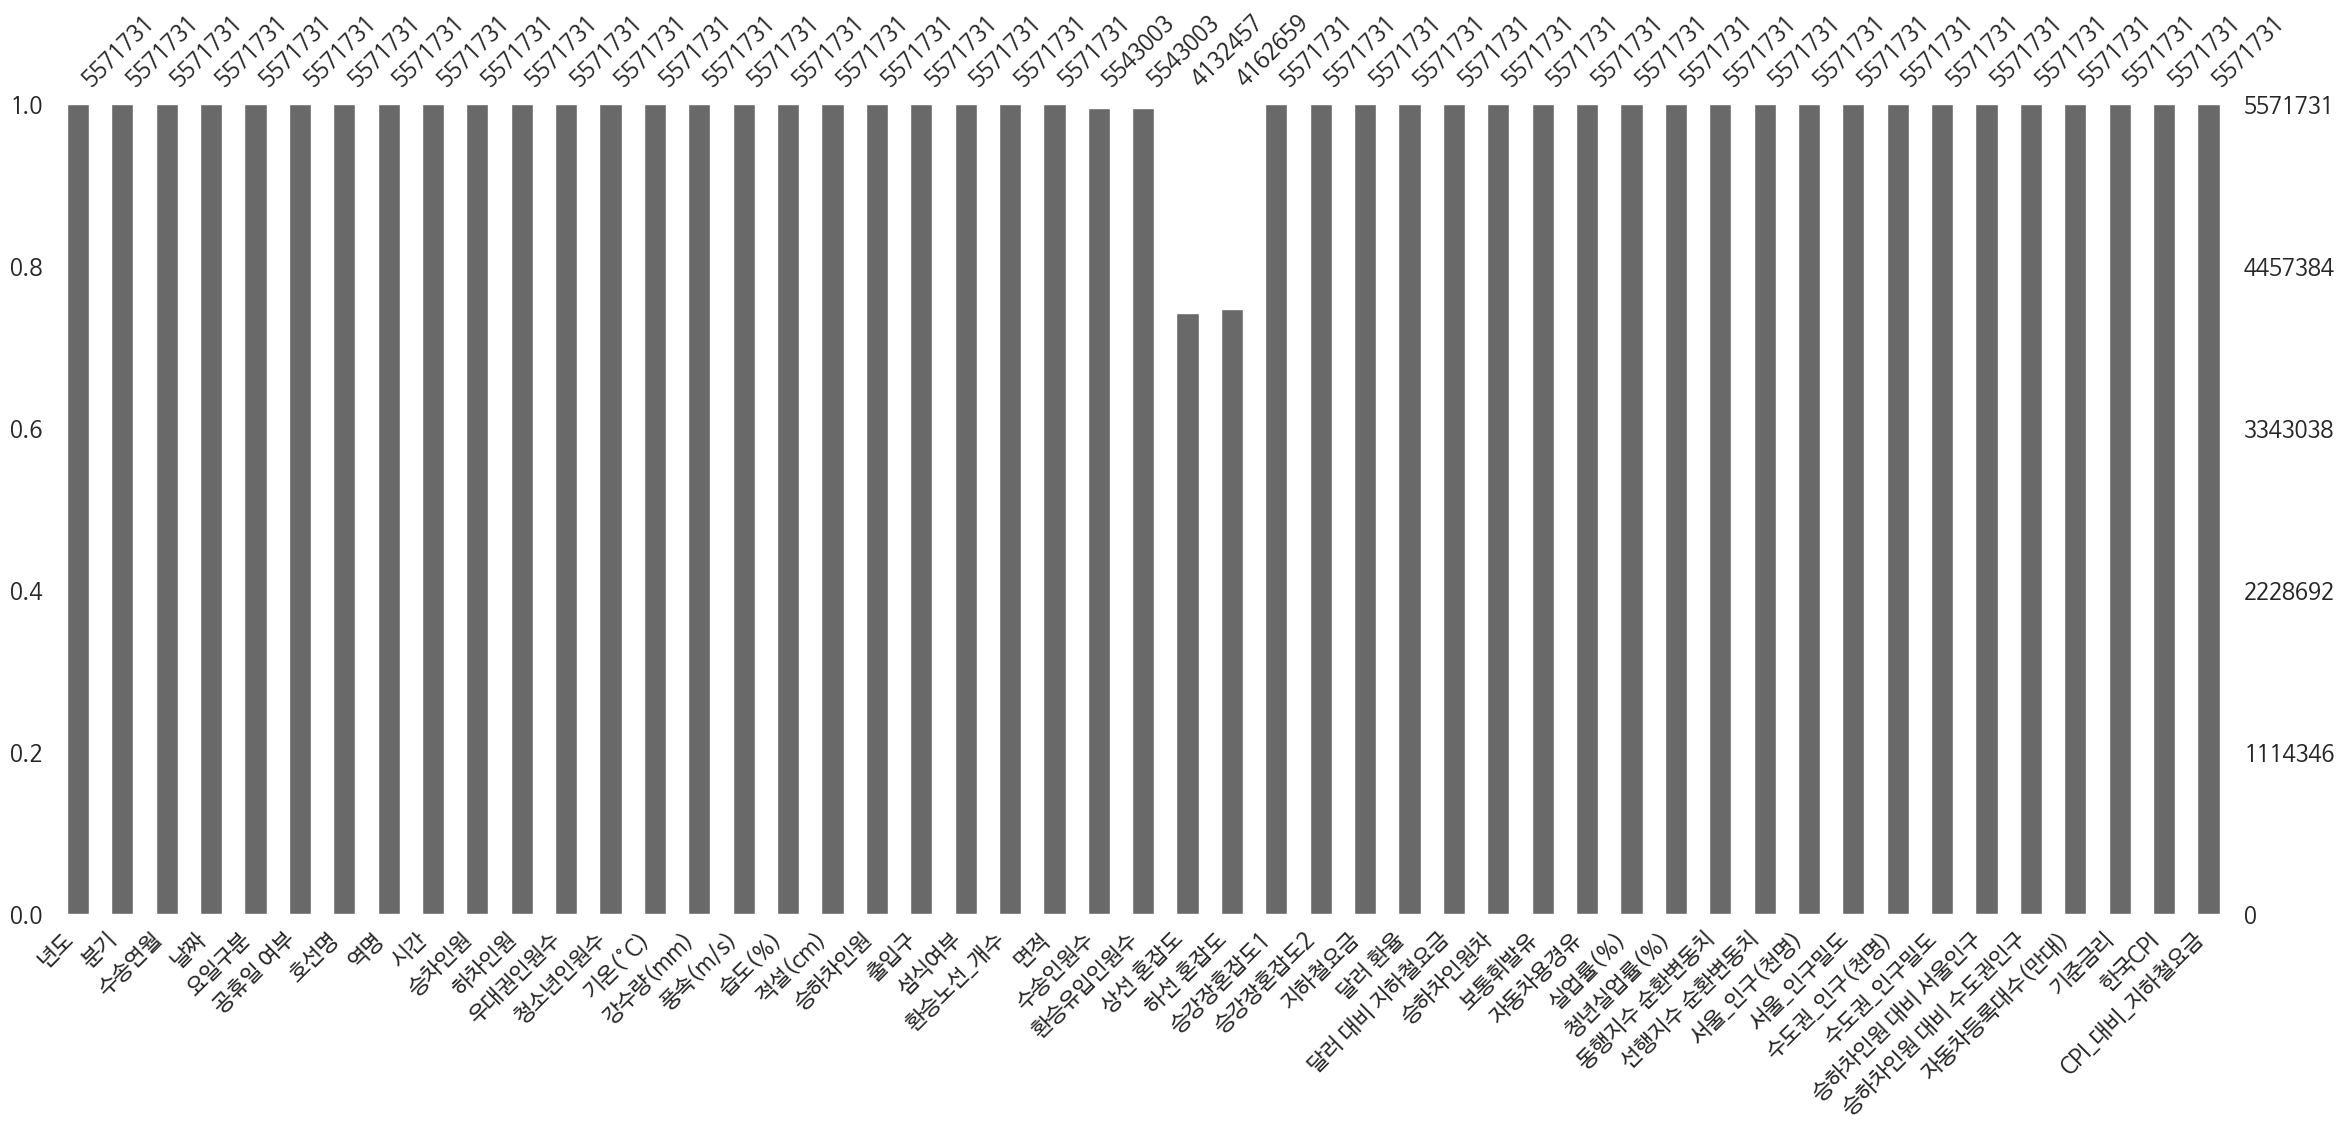

In [11]:
msno.bar(df)

In [14]:
df[['상선 혼잡도', '하선 혼잡도', '승강장혼잡도1', '승강장혼잡도2']]

,상선 혼잡도,하선 혼잡도,승강장혼잡도1,승강장혼잡도2
0,5.9000,10.5000,1.7062,1.3479
1,7.4500,13.3000,2.9513,2.3315
2,12.0000,38.5500,3.5738,2.8233
3,18.1500,60.3000,4.9111,3.8798
4,14.8000,37.6500,6.8940,5.4463
...,...,...,...,...
5571726,11.3500,20.5000,29.7145,23.4745
5571727,10.5000,16.9500,28.2608,22.3260
5571728,10.7000,13.9000,23.2098,18.3358
5571729,9.8000,11.2500,22.2243,17.5572


In [15]:
df[['수송인원수', '환승유입인원수']]

,수송인원수,환승유입인원수
0,"410,367.0000","154,301.0000"
1,"410,367.0000","154,301.0000"
2,"410,367.0000","154,301.0000"
3,"410,367.0000","154,301.0000"
4,"410,367.0000","154,301.0000"
...,...,...
5571726,"705,635.0000","246,766.0000"
5571727,"705,635.0000","246,766.0000"
5571728,"705,635.0000","246,766.0000"
5571729,"705,635.0000","246,766.0000"


In [9]:
%matplotlib inline

Target looks like regression


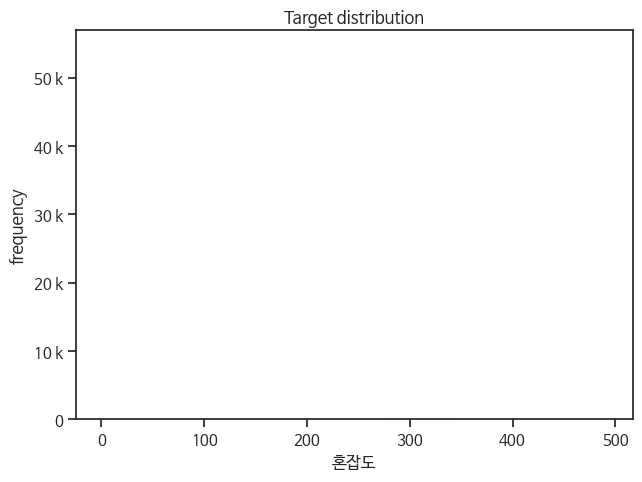

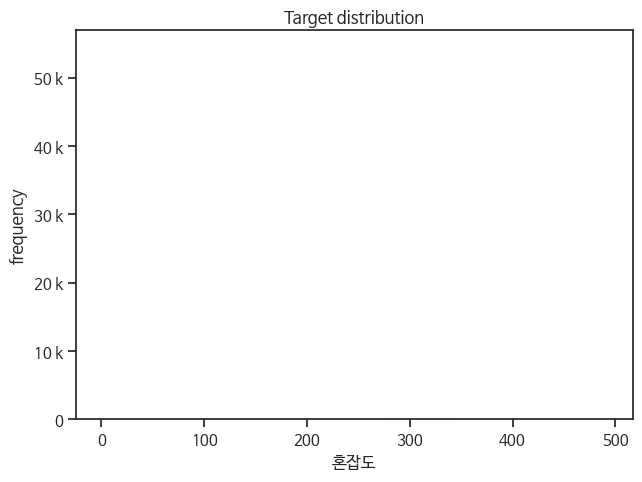

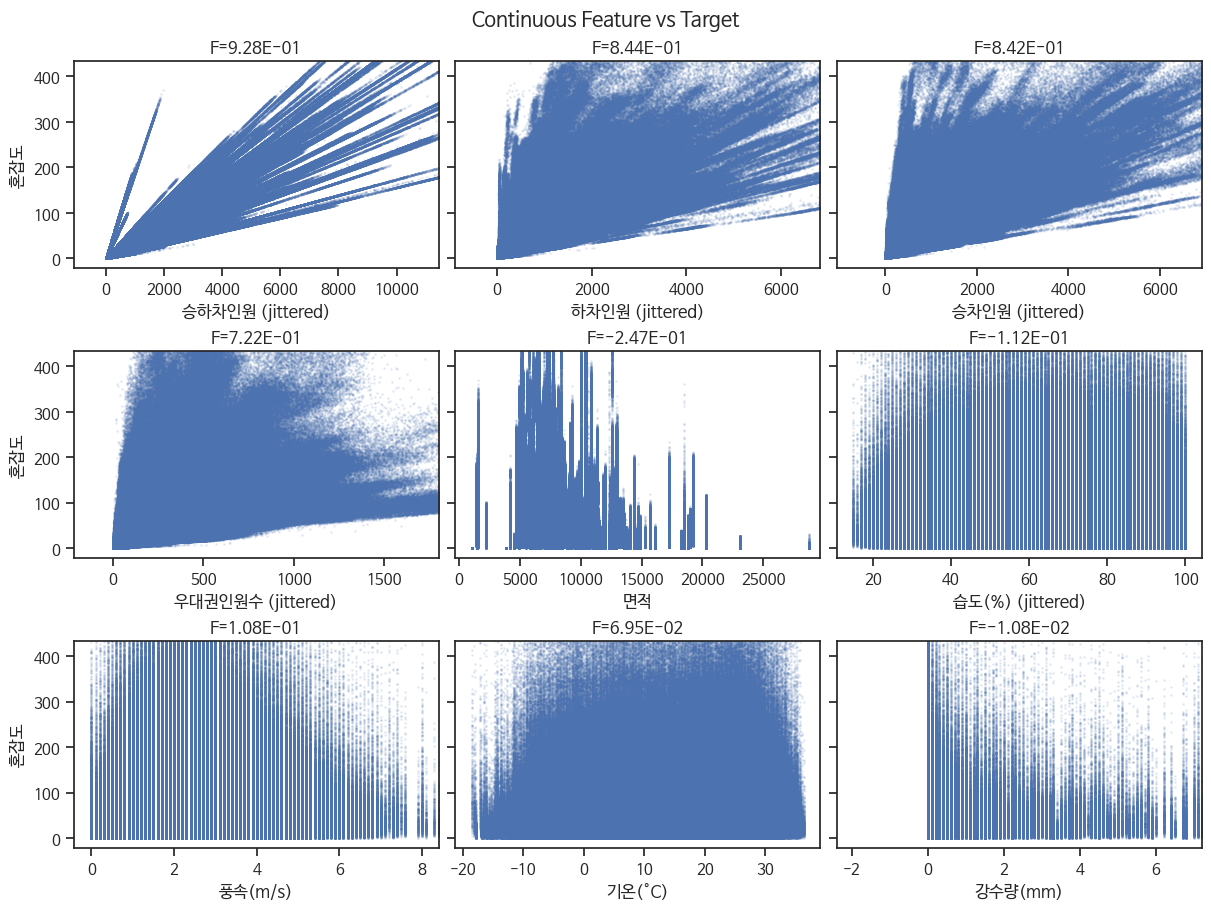

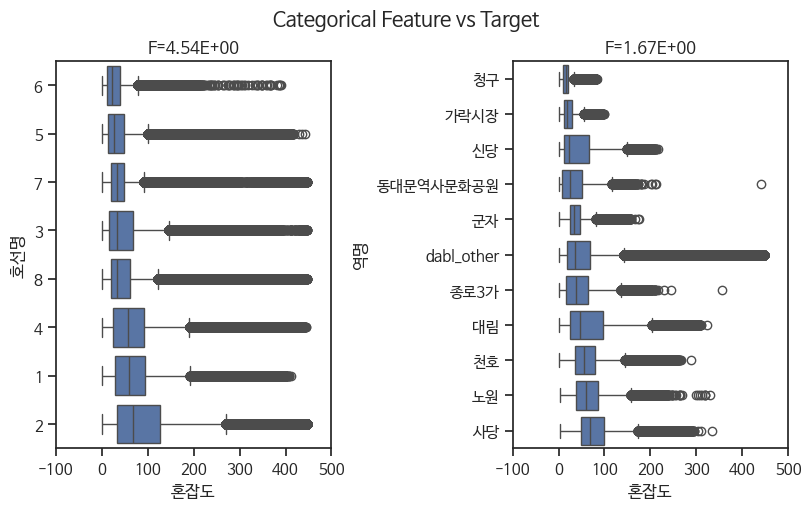

                                             |                                             | [  0%]   00:00 ->…

Report C:\DataScience\[DEIA]\[DEBA]\Project-SubwayPrediction\Result\descriptive_bySweetViz_KK.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Colum

pair_scatters can be found in URL below:
Launching server at http://localhost:10873


distplots can be found in URL below:
Launching server at http://localhost:10874


violinplots can be found in URL below:
Launching server at http://localhost:10875


No date vars could be found in data set
heatmaps can be found in URL below:
Launching server at http://localhost:10876


cat_var_plots can be found in URL below:
Launching server at http://localhost:10877
Time to run AutoViz (in seconds) = 2


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
descriptive_KK(df, target='혼잡도')